# Problem 3-3: Kleinberg Network Model

Submission from Maria Kagkeli, Maria Regina Lily, and Mihai Verzan

## 1. Kleinberg Random Network Generator

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy.spatial.distance import euclidean
import random 

In [2]:
def kleinberg(l, a):
    #create lattice netwrok with l^2 nodes
    G = nx.grid_graph(dim=[l,l])
    nodes = G.nodes
    
    #try to add link for every node x
    for x in nodes:
        
        #create a list of all possible target nodes y
        Y = list(G)
        Y.remove(x)
       

        #calculate probability that node x is linked with the target nodes y
        #formula given by the question
        dist = np.array([euclidean(x, y) for y in Y])
        C_x = np.sum(dist**(-a))
        P_x = (1/C_x)*(dist**(-a))
     
        #create a weighted list of choice, weight of node y is p_x(y)
        choice = []
        for y in range(len(Y)): 
            
            weight = int(P_x[y]*10000)
            choice = choice + [y]*(weight) 

       
        #choose a random target node y from choice
        target= Y[random.choice(choice)]
        
        #add new link (x, target) if it doesn't already exist
        if (x,target) not in G.edges():
            G.add_edge(x,target)
           
        
    return G


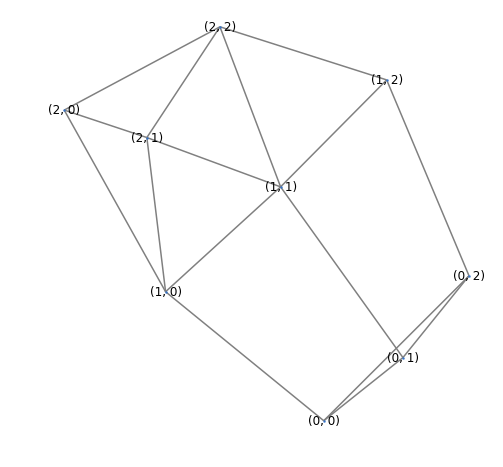

In [4]:
#test
G = kleinberg(3,1)

#visualize graph 
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)
plt.axis('off')
nx.draw_networkx(G,  edge_color="gray", font_color="black", width=1.5, node_size=5, node_color="b")
plt.show()

## 2. Average Shortest Path Length

Set up values for experiment

In [29]:
L = [ 2,5,7,10,12,15,18,20,25,28,30,32 ]
N = [l*l for l in L]

G_0 = [kleinberg(l,0) for l in L]
G_1 = [kleinberg(l,1) for l in L]
G_2 = [kleinberg(l,2) for l in L]
G_3 = [kleinberg(l,3) for l in L]
G_4 = [kleinberg(l,4) for l in L]
G_5 = [kleinberg(l,5) for l in L]

CPU times: user 5min 20s, sys: 2.59 s, total: 5min 22s
Wall time: 13min 41s
CPU times: user 5min 17s, sys: 2.32 s, total: 5min 20s
Wall time: 11min 45s
CPU times: user 5min 21s, sys: 1.67 s, total: 5min 23s
Wall time: 11min 5s
CPU times: user 5min 23s, sys: 1.59 s, total: 5min 24s
Wall time: 11min 12s
CPU times: user 5min 30s, sys: 2.15 s, total: 5min 32s
Wall time: 16min 49s
CPU times: user 5min 26s, sys: 1.89 s, total: 5min 28s
Wall time: 12min 8s


In [ ]:
avg_path0 = [nx.average_shortest_path_length(g) for g in G_0]
avg_path1 = [nx.average_shortest_path_length(g) for g in G_1]
avg_path2 = [nx.average_shortest_path_length(g) for g in G_2]
avg_path3 = [nx.average_shortest_path_length(g) for g in G_3]
avg_path4 = [nx.average_shortest_path_length(g) for g in G_4]
avg_path5 = [nx.average_shortest_path_length(g) for g in G_5]


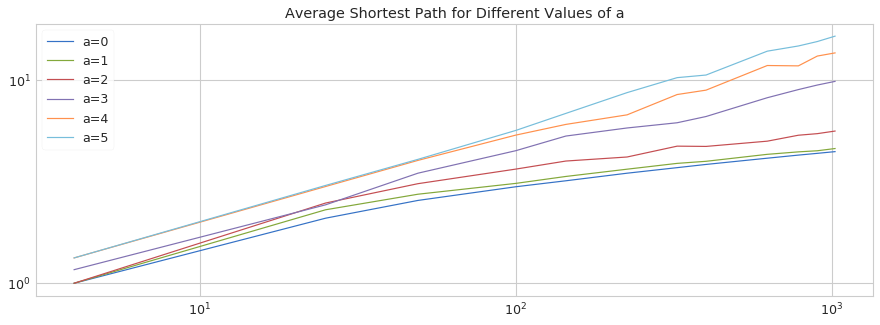

In [27]:
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
fig.set_figwidth(15)
fig.set_figheight(5)

plt.plot(X, avg_path0)
plt.plot(X, avg_path1)
plt.plot(X, avg_path2)
plt.plot(X, avg_path3)
plt.plot(X, avg_path4)
plt.plot(X, avg_path5)

ax.legend(["a=0","a=1", "a=2", "a=3", "a=4", "a=5"])
plt.title("Average Shortest Path for Different Values of a")
plt.show()

## 3. Discussion

## 4. Average Local Clustering Coefficient 

In [ ]:
avg_lcc0 = [nx.average_clustering(g) for g in G_0]
avg_lcc1 = [nx.average_clustering(g) for g in G_1]
avg_lcc2 = [nx.average_clustering(g) for g in G_2]
avg_lcc3 = [nx.average_clustering(g) for g in G_3]
avg_lcc4 = [nx.average_clustering(g) for g in G_4]
avg_lcc5 = [nx.average_clustering(g) for g in G_5]

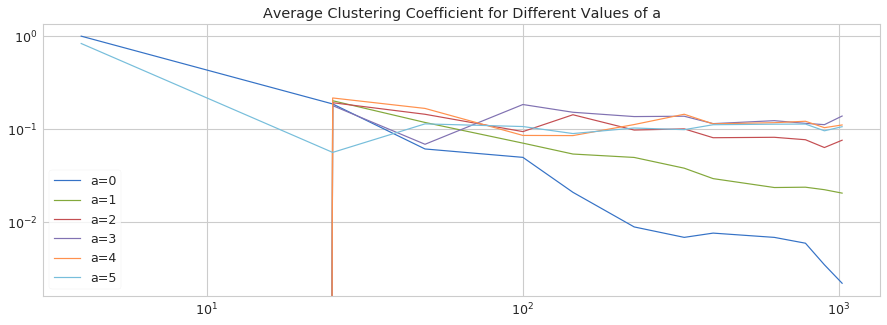

In [32]:
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
fig.set_figwidth(15)
fig.set_figheight(5)

plt.plot(X, avg_lcc0)
plt.plot(X, avg_lcc1)
plt.plot(X, avg_lcc2)
plt.plot(X, avg_lcc3)
plt.plot(X, avg_lcc4)
plt.plot(X, avg_lcc5)

ax.legend(["a=0","a=1", "a=2", "a=3", "a=4", "a=5"])
plt.title("Average Clustering Coefficient for Different Values of a")
plt.show()